In [1]:
import os
import sys

import numpy  as np
import tables as tb
import pandas as pd
import matplotlib
import math

#the line below makes the plot as a pop-up, that can be saved
#matplotlib.use('TkAgg')

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs

import matplotlib.cm as cm
from matplotlib.colors import Normalize

from IC.invisible_cities.evm.event_model        import Cluster, Hit
from IC.invisible_cities.types.ic_types         import xy
from IC.invisible_cities.reco.paolina_functions import voxelize_hits

from IC.invisible_cities.core.exceptions import NoHits

In [2]:
import functions.histo_functions as myhf
import functions.efficiency_functions as myef
import functions.recovstrue as myrvt

In [3]:
npz_path = '/Users/halmamol/NEXT/NBarrays/'
npz_filename_DS = 'ereco_DETSIM_R21mm.npz' 
npz_filename_FS = 'ereco_FULLSIM_R21mm.npz'
npz_filename_DS_21_oec = 'ereco_DETSIM_R21mm_oec.npz' 
npz_filename_DS_18_oec = 'ereco_DETSIM_R18mm_oec.npz' 

In [4]:
d_DS = np.load(npz_path+npz_filename_DS)
d_FS = np.load(npz_path+npz_filename_FS)
d_DS_21_oec = np.load(npz_path+npz_filename_DS_21_oec, allow_pickle=True)
d_DS_18_oec = np.load(npz_path+npz_filename_DS_18_oec, allow_pickle=True)

reco_0nubb_e_DS = d_DS['reco_0nubb_e']
reco_0nubb_e_FS = d_FS['reco_0nubb_e']
reco_selectron_e_DS = d_DS['reco_selectron_e']
reco_selectron_e_FS = d_FS['reco_selectron_e']

reco_0nubb_e_DS_21_oec = d_DS_21_oec['reco_0nubb_e']
reco_selectron_e_DS_21_oec = d_DS_21_oec['reco_selectron_e']

reco_0nubb_e_DS_18_oec = d_DS_18_oec['reco_0nubb_e']
reco_selectron_e_DS_18_oec = d_DS_18_oec['reco_selectron_e']

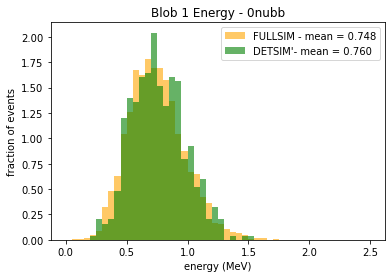

Blob1 FS/DS = 0.985-> 1.52%


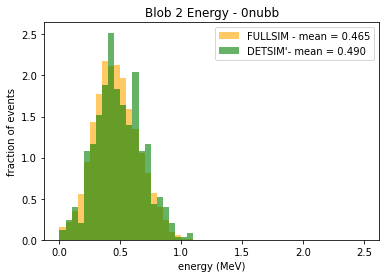

Blob2 FS/DS = 0.950-> 4.96%


In [5]:
plt.hist(reco_0nubb_e_FS[1], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='orange', label = "FULLSIM - mean = {:.3f}".format(np.mean(reco_0nubb_e_FS[1])))
plt.hist(reco_0nubb_e_DS[1], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "DETSIM'- mean = {:.3f}".format(np.mean(reco_0nubb_e_DS[1])))
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 1 Energy - 0nubb')
plt.legend(loc=1);
plt.show()
print("Blob1 FS/DS = {:.3f}-> {:.2f}%".format(np.mean(reco_0nubb_e_FS[1])/np.mean(reco_0nubb_e_DS[1]), (1-np.mean(reco_0nubb_e_FS[1])/np.mean(reco_0nubb_e_DS[1]))*100))
plt.hist(reco_0nubb_e_FS[2], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='orange', label = "FULLSIM - mean = {:.3f}".format(np.mean(reco_0nubb_e_FS[2])))
plt.hist(reco_0nubb_e_DS[2], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "DETSIM'- mean = {:.3f}".format(np.mean(reco_0nubb_e_DS[2])))
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 2 Energy - 0nubb')
plt.legend(loc=1);
plt.show()
print("Blob2 FS/DS = {:.3f}-> {:.2f}%".format(np.mean(reco_0nubb_e_FS[2])/np.mean(reco_0nubb_e_DS[2]), (1-np.mean(reco_0nubb_e_FS[2])/np.mean(reco_0nubb_e_DS[2]))*100))

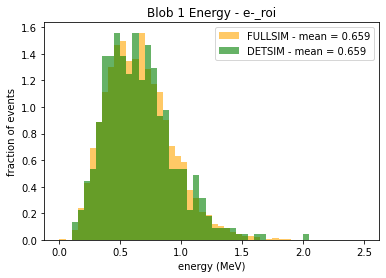

Blob1 FS/DS = 1.000-> -0.04%


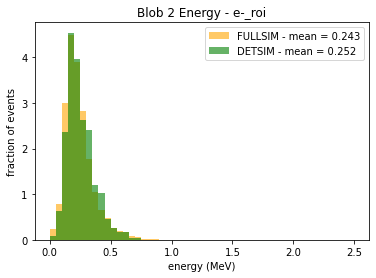

Blob2 FS/DS = 0.963-> 3.69%


In [6]:
plt.hist(reco_selectron_e_FS[1], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='orange', label = "FULLSIM - mean = {:.3f}".format(np.mean(reco_selectron_e_FS[1])))
plt.hist(reco_selectron_e_DS[1], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "DETSIM - mean = {:.3f}".format(np.mean(reco_selectron_e_DS[1])))
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 1 Energy - e-_roi')
plt.legend(loc=1);
plt.show()
print("Blob1 FS/DS = {:.3f}-> {:.2f}%".format(np.mean(reco_selectron_e_FS[1])/np.mean(reco_selectron_e_DS[1]), (1-np.mean(reco_selectron_e_FS[1])/np.mean(reco_selectron_e_DS[1]))*100))
plt.hist(reco_selectron_e_FS[2], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='orange', label = "FULLSIM - mean = {:.3f}".format(np.mean(reco_selectron_e_FS[2])))
plt.hist(reco_selectron_e_DS[2], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "DETSIM - mean = {:.3f}".format(np.mean(reco_selectron_e_DS[2])))
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 2 Energy - e-_roi')
plt.legend(loc=1);
plt.show()
print("Blob2 FS/DS = {:.3f}-> {:.2f}%".format(np.mean(reco_selectron_e_FS[2])/np.mean(reco_selectron_e_DS[2]), (1-np.mean(reco_selectron_e_FS[2])/np.mean(reco_selectron_e_DS[2]))*100))

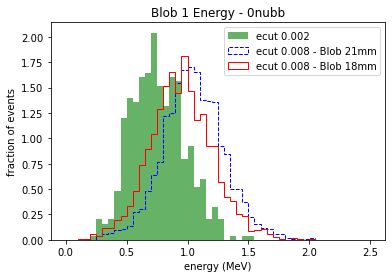

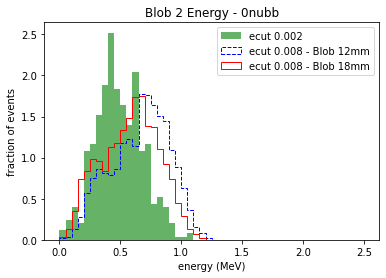

In [7]:
plt.hist(reco_0nubb_e_DS[1], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "ecut 0.002")
plt.hist(reco_0nubb_e_DS_21_oec[1], bins = 50, range = (0, 2.5),density=True, color='blue', histtype='step', label = 'ecut 0.008 - Blob 21mm', linestyle='dashed')
plt.hist(reco_0nubb_e_DS_18_oec[1], bins = 50, range = (0, 2.5),density=True, color='red', histtype='step', label = 'ecut 0.008 - Blob 18mm')
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 1 Energy - 0nubb')
plt.legend(loc=1);
plt.show()
plt.hist(reco_0nubb_e_DS[2], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "ecut 0.002")
plt.hist(reco_0nubb_e_DS_21_oec[2], bins = 50, range = (0, 2.5),density=True, color='blue', histtype='step', label = 'ecut 0.008 - Blob 12mm', linestyle='dashed')
plt.hist(reco_0nubb_e_DS_18_oec[2], bins = 50, range = (0, 2.5),density=True, color='red', histtype='step', label = 'ecut 0.008 - Blob 18mm')
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 2 Energy - 0nubb')
plt.legend(loc=1);
plt.show()

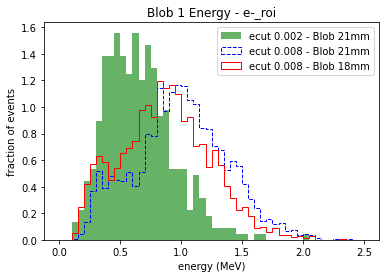

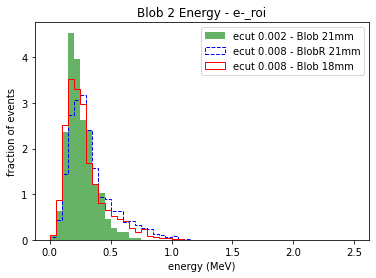

In [8]:
plt.hist(reco_selectron_e_DS[1], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "ecut 0.002 - Blob 21mm")
plt.hist(reco_selectron_e_DS_21_oec[1], bins = 50, range = (0, 2.5),density=True, color='blue', histtype='step', label = 'ecut 0.008 - Blob 21mm', linestyle='dashed')
plt.hist(reco_selectron_e_DS_18_oec[1], bins = 50, range = (0, 2.5),density=True, color='red', histtype='step', label = 'ecut 0.008 - Blob 18mm')
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 1 Energy - e-_roi')
plt.legend(loc=1);
plt.show()
plt.hist(reco_selectron_e_DS[2], bins = 50, range = (0, 2.5),density=True, alpha=0.6, color='green', label = "ecut 0.002 - Blob 21mm")
plt.hist(reco_selectron_e_DS_21_oec[2], bins = 50, range = (0, 2.5),density=True, color='blue', histtype='step', label = 'ecut 0.008 - BlobR 21mm', linestyle='dashed')
plt.hist(reco_selectron_e_DS_18_oec[2], bins = 50, range = (0, 2.5),density=True, color='red', histtype='step', label = 'ecut 0.008 - Blob 18mm')
plt.xlabel('energy (MeV)')
plt.ylabel('fraction of events')
plt.title('Blob 2 Energy - e-_roi')
plt.legend(loc=1);
plt.show()